<a href="https://colab.research.google.com/github/AIGeekProgrammer/MiscellaneousAI/blob/main/NN/Small_neural_network_using_PyTorch_and_Dataset_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook: Small neural network using PyTorch and Dataset / DataLoader<br>
Author: Szymon Manduk<br>
Created: 19 Feb 2022<br>


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from torch.utils.data import Dataset, DataLoader
from torch.nn import Linear

In [ ]:
# generate 2 circles that can't be separated by line
class CircleFactory(Dataset):
  def __init__(self, n_points):
    X, y = datasets.make_circles(n_points, random_state=1, noise=0.05, factor=0.3)
    self.data = torch.Tensor(X)
    self.label = torch.Tensor(y).reshape([n_points, 1])
    print(self.data.shape, self.label.shape)
    print(self.data.dtype, self.label.dtype)
  
  def __len__(self):
    return len(self.label)

  def __getitem__(self, index):
    data = self.data[index]
    label = self.label[index]
    return data, label

  def display(self):
    plt.scatter(self.data[:,0], self.data[:, 1], c=self.label)

In [ ]:
dataset = CircleFactory(500)

torch.Size([500, 2]) torch.Size([500, 1])
torch.float32 torch.float32


In [ ]:
len(dataset)

500

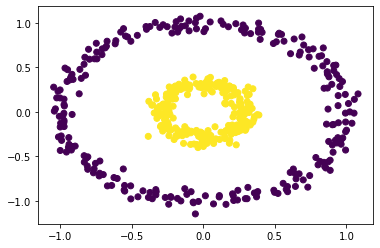

In [ ]:
dataset.display()

In [ ]:
dataset.__getitem__(1)

(tensor([-0.1100,  0.1939]), tensor([1.]))

In [ ]:
train_dataset = DataLoader(dataset, batch_size=10, shuffle=True)

In [ ]:
# define NN with one hidden layer
class SimpleNN(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.linear1 = Linear(input_size, hidden_size)
    self.linear2 = Linear(hidden_size, output_size)
  
  def forward(self, x):
    l1 = torch.sigmoid(self.linear1(x))
    l2 = torch.sigmoid(self.linear2(l1))
    return l2

In [ ]:
torch.manual_seed(1)
model = SimpleNN(2, 4, 1)

In [ ]:
epochs = 1000
learning_rate = 0.01

In [ ]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Epoch #:0 with loss=0.7070752382278442
Epoch #:20 with loss=0.5349041223526001
Epoch #:40 with loss=0.18331244587898254
Epoch #:60 with loss=0.037293531000614166
Epoch #:80 with loss=0.018722331151366234
Epoch #:100 with loss=0.01137352455407381
Epoch #:120 with loss=0.004662615247070789
Epoch #:140 with loss=0.0031824589241296053
Epoch #:160 with loss=0.004224604461342096
Epoch #:180 with loss=0.0012475993717089295
Epoch #:200 with loss=0.0012674292083829641
Epoch #:220 with loss=0.0004870612174272537
Epoch #:240 with loss=0.0005760223721154034
Epoch #:260 with loss=0.0003953258856199682
Epoch #:280 with loss=4.475260357139632e-05
Epoch #:300 with loss=5.7598586863605306e-05
Epoch #:320 with loss=4.891984281130135e-05
Epoch #:340 with loss=1.8424083464196883e-05
Epoch #:360 with loss=1.1307119166303892e-05
Epoch #:380 with loss=6.288330951065291e-06
Epoch #:400 with loss=1.0872153325180989e-05
Epoch #:420 with loss=8.636861821287312e-06
Epoch #:440 with loss=3.594172540033469e-06
Epoc

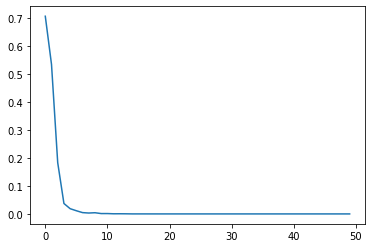

In [ ]:
losses = []
for epoch in range(epochs):
  for x, y in train_dataset:
    optimizer.zero_grad()
    yhat = model.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
  if epoch%20 == 0:
    print(f'Epoch #:{epoch} with loss={loss}')
    losses.append(loss.detach().cpu().numpy())
plt.plot(losses)